# Week 4: Intro to Statistics and Probability

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random

## Day 3: Intro to Probability (2)
### Bayes' Theorem
* The Bayes' Theorem is a result in probability theory which relates the conditinal probabilities of two events, $A$ and $B$. It is a simple and powerful tool that allows us to *reverse the conditioning* in a conditional probability calculations. In short, it says that the relation between $P(A \mid B)$ and $P(B \mid A)$ is given by
\begin{equation} P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} \end{equation}
This result extends beyond simple probabilities and is heavily exploited in classification methods in machine learning (and not just there)

We will demonstrate its application on through examples.

### Example 1
* It is estimated that 4% of people who spend time in the woods will get Lyme disease. Of people with Lyme disease, the test to determine if you have it is will give a positive reading 97% of the time. Of people who do not have Lyme disease, the same test will give a negative rating 92% of the time. Find the probability that a **person really has Lyme disease, given that they test positive**.

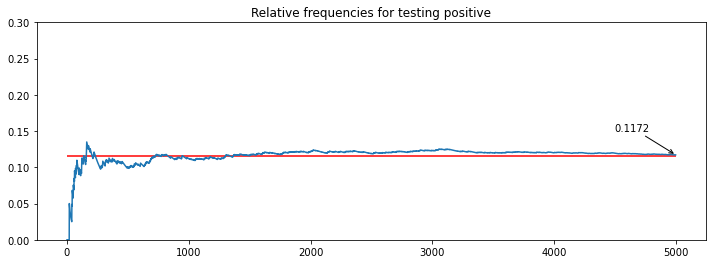

P(tests positive) =  0.1172
P(has lyme AND tests positive) =  0.039
P(has Lyme | tests positive) =  0.33276450511945393


In [2]:
# We will perform a simulation

n = 5000 # simulations

positive = np.zeros(n) #here we store the positive tests
freq = np.zeros(n) #here we store the frequencies
has_lyme_and_tests_positive = 0

for i in range(n):
    has_lyme = np.random.random() #generate a random number in [0, 1)
    test_pos = np.random.random()
    if has_lyme <= 0.04: # we got a sick patient
        if test_pos <= 0.97: # we got a positive test
            positive[i] = 1
            has_lyme_and_tests_positive += 1
    else: # we got a healthy patient
        if test_pos <= 0.08: # we got a positive test
            positive[i] = 1
    freq[i] = np.sum(positive)/(i+1)

# Visualize the relative frequencies
plt.figure(figsize=(12, 4))
plt.hlines(0.1156, 0, n, colors='r')
plt.plot(freq)
plt.ylim(0, 0.3)
plt.title('Relative frequencies for testing positive')
plt.annotate(freq[-1], xy=(n, freq[-1]), xytext=(0.9*n, 0.15), arrowprops=dict(arrowstyle='->') )
plt.show()

print('P(tests positive) = ', freq[-1])
print('P(has lyme AND tests positive) = ', has_lyme_and_tests_positive/n)
print('P(has Lyme | tests positive) = ', (has_lyme_and_tests_positive/n)/freq[-1])

### Example 2
Tom has three ways of getting to work. 30% of the time he travels by car, 20% of the time he rides his bicycle and 50% of the time he walks.

* When travelling by car, Tom is late 5% of the time.
* When riding his bicycle he is late 10% of the time.
* When walking he is late 25% of the time.

Given that he was on time one day, find the probability that he got to work riding his bicycle.

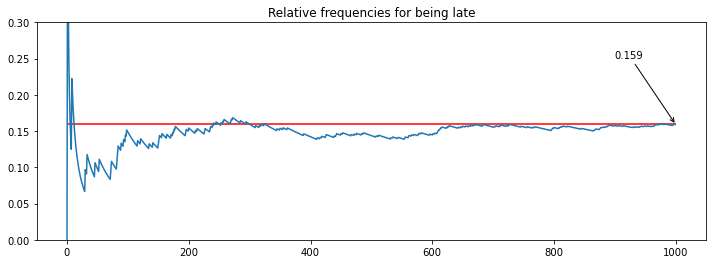

P(he is on time) =  0.841
P(he rode bike AND is on time) =  0.183
P(rode bike | he is on time) =  0.21759809750297265


In [3]:
n = 1000

late = np.zeros(n)
freq = np.zeros(n)
rode_bike_and_was_on_time = 0

for i in range(n):
    transport = np.random.random() # what transportation has he used
    is_late = np.random.random() # is he late?
    if transport <= 0.30: # bottom 30%, he travels by car
        if is_late <= 0.05: # he is late
            late[i] = 1
    elif transport <= 0.50: # next 20%, he bikes
        if is_late <= 0.10: # he is late
            late[i] = 1
        else: # rode bike, and is on time
            rode_bike_and_was_on_time += 1
    else: # he walks, the top 50%
        if is_late <= 0.25:
            late[i] = 1
    freq[i] = np.sum(late)/(i+1)

# Visualize the relative frequencies
plt.figure(figsize=(12, 4))
plt.hlines(0.16, 0, n, colors='r')
plt.plot(freq)
plt.ylim(0, 0.3)
plt.title('Relative frequencies for being late')
plt.annotate(freq[-1], xy=(n, freq[-1]), xytext=(0.9*n, 0.25), arrowprops=dict(arrowstyle='->') )
plt.show()

print('P(he is on time) = ', 1-freq[-1])
print('P(he rode bike AND is on time) = ', rode_bike_and_was_on_time/n)
print('P(rode bike | he is on time) = ', (rode_bike_and_was_on_time/n)/(1-freq[-1]))